# Linear Regression의 Gradient Descent 요약정리

Date: 2018-01-14

아래 내용은 코세라의 머신러닝 과정 중 1개의 변수를 갖는 Linear Regression에 대한 부연설명이다.
동영상이 너무 잘되어 있어서 부연설명하는 것 자체가 쓸데 없지만, 암튼, 내 나름대로 정리를 하고 싶었다.

강의 내용 중 가장 중요한 것은 주어진 가설함수가 선형이라고 가정하고,

가설함수 $ y = \theta_0 x_0 + \theta_1 x_1 $에서 기울기에 해당하는 $ \theta_1 $를 어떻게 구할 것인가이다. 여기서는 $ \theta_0 $는 $ x_0 $ 가 1일 때 bias에 해당하는 값인데, 여기서는 무시한다.

첫째는 가설함수에 입력이 주어졌을 때 나오는 출력값이 원래의 출력값하고 차이가 거의 없을 때의 $ \theta_1 $가 가장 좋지 않겠는가?

그래서 비용함수를 정의 하는데, (예측값 - 실제값)을 이용해 정의한다. (예측값 - 실제값)은 +- 값이 나와서 모두 합하면 값이 상쇄되니까 원하는 역할을 못한다. 그래서 (예측값 - 실제값)의 제곱을 하고 그 모든 것을 더해서 평균을 낸다.

이 비용함수는 x에 대한 2차 함수가 된다. 2차 함수는 포물선이고 여기서 위의 평균값이 가장 작은 곳을 찾는 것이 좋고, 그 이야기는 비용함수를 미분했을 때의 값이 0에 가까워야 한다는거다.


여기서, 기울기 theta를 업데이트 하는 과정을 좀더 살펴 보자. (Gradient Descent 경사하강)

강의에서는 다음과 같은 업데이트 규칙을 설명하고 있다.

$ \theta_{j} := \theta_{}j - \alpha \frac{1}{m}\sum_{i=1}^{m} ( h_{\theta}(x^{(i)}) - y^{(i)}   )x_{j}^{(i)}  $ (**동시에 모든 j에 대해서 $ \theta_{j} $ 를 업데이트 한다**)


이것만 보면, 솔직히 뭔소리인지 잘 모른다. 하지만 아래 코드를 보면 쉽다.

```
        prediction = X.dot(theta) # 현재의 theta 정보로 예측값을 구하고
        error = prediction - y # 예측값과 실제값 사이의 오차값을 구한다.
        
        # 각 샘플의 입력값(X)와 오차값(error)의 내적을 구한다. 내적의 결과는 단일한 스칼라값(delta)가 된다.
        delta = (1.0/m) * error.dot(X) 
        
        # 입력값과 오차값의 곱과 learning rate인 alpha를 이용해서 현재의 theta를 조정한다.
        theta = theta - alpha * delta
``` 

좀 더 풀어서 설명해본다.

theta가 여러개 있는데 그 중 하나의 $ \theta_j $ 에 대해서 기울기 값을 결정해야 하는데...

- 예측값(prediction)과 실제값의 차이(error)를 이용하는 것이 좋고 (왜냐하면, 차이가 크면 클수록 기울기 값이 원래 값하고 많이 차이남을 알 수 있으니까)
- 차이값(error)을 이용해서 기존 theta 를 업데이트 하는데... 기울기도 (+) 방향이 있고 (-) 방향이 있지 않겠는가? 그리고 x값의 크고 작음에 대해서도 오차값의 크기가 영향을 받을 수 있다.
- 1번과 2번을 서로 곱해 준건 delta 라 하자. 여기서는 $ \sum $ 이 있는데, 이건 error.dot(X)로 오차와 입력값의 곱의 합을 한 방에 계산해 주고 있다.
- 이 delta가 기존 theta보다 많이 클수가 있다. 즉, 기존 theta의 가감정도(+- 하는 정도)를 작게 할 필요가 있다. 이걸 learning rate(alpha)라고 하자.

In [27]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

def ComputeCost(X, y, theta):
    
    J = 0 # 비용
    m, n = X.shape # m: 샘플의 갯수, n: 피쳐의 갯수
    
    # X: (m, n), theta: (n,)
    prediction = X.dot(theta) # 예측값
    
    error = prediction - y # 오차값 = 예측값 - 실제값
    J = 1/(2.0*m) * np.sum(error**2) # 비용 = 1/(2m)*sum(error**2)
    
    return J

# 입력자료 x = 1일때 y = 0.5 였다.
#
X = np.array([[1]]) # 2차원 배열로 선언한다.
y = np.array([0.5])
theta = np.array([1]) # 임의로 1로 선정한다.

J = ComputeCost(X, y, theta)
print("비용 = %s" % J)

Populating the interactive namespace from numpy and matplotlib
비용 = 0.125


[ 0.52452045]


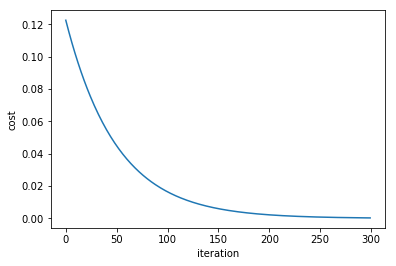

In [28]:
def GradientDescent(X, y, theta, alpha, num_iters):
    
    m = np.size(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        
        prediction = X.dot(theta) # 현재의 theta 정보로 예측값을 구하고
        error = prediction - y # 예측값과 실제값 사이의 오차값을 구한다.
        
        # 각 샘플의 입력값(X)와 오차값(error)의 내적을 구한다. 내적의 결과는 단일한 스칼라값(delta)가 된다.
        delta = (1.0/m) * error.dot(X) 
        
        # 입력값과 오차값의 곱과 learning rate인 alpha를 이용해서 현재의 theta를 조정한다.
        theta = theta - alpha * delta
        
        # 비용정보를 계산해서 배열에 저장한다. => 비용이 감소하는지 확인하기 위함
        J_history[iter] = ComputeCost(X, y, theta)
        
    return theta, J_history

alpha = 0.01 # learning rate: 올바른 기울기를 구하는 과정에서, 더하거나 빼지는 값을 작게 조절한다.
iterations = 300 # 반복 횟수

# 기울기 theta와 비용정보를 구한다.
theta1, j = GradientDescent(X, y, theta, alpha, iterations)

# 위에서 구한 theta1를 이용해서 값을 예측해본다.
print(X.dot(theta1))

# 비용정보를 그래프로 그려서 점차 감소하는지 확인한다.
plt.plot(j)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [29]:
# 행렬과 벡터의 곱셈 연습

# 벡터와 행렬의 곱셈
a = np.array([1, 2, 3])
B = np.array([[2, 2, 2, 3], [3, 3, 3, 4], [1, 0, 0, 5]])

# a: 1x3, b: 3x4, a.dot(B) = 1x3 * 3x4 = 1x4
print(a.dot(B)) # 벡터와 행렬의 곱 => 벡터가 행벡터 역할을 한다. 즉 1xm * mxn = 1xn

# 행렬과 벡터의 곱셈
c = np.array([1, 2, 3, 2])
D = np.array([[2, 2, 2, 3], [3, 3, 3, 4], [1, 0, 0, 5]])

# c: 4x1, D: 3x4, D.dot(c) = 3x4 * 4x1 = 3x1
print(D.dot(c)) # 행렬과 벡터의 곱 => 벡터가 열벡터 역할을 한다. 즉 mxn * nx1 = mx1

[11  8  8 26]
[18 26 11]


위의 예제는 입력값이 1개, 샘플수도 1개이고, bias 는 없었다.

하지만, 위 함수는 여러개의 입력변수에 여러개의 샘플들도 적용이 __그대로__ 가능하다.

자, 이제 입력값의 요소는 2개이고, bias도 추가해보자. 그리고 샘플 수는 3개라고 하자.

예측값 = [ 7.5801471  9.5014796]
theta = [ 0.88914946  0.75506656  0.58313297]


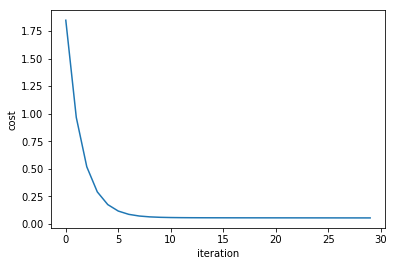

In [30]:
X = np.array([[1, 2, 3.5], [1, 2.5, 4], [1, 3, 6]]) # 각 벡터의 첫번째 컬럼의 값이 1인 것은 x0에 해당하는 값이다.
y = np.array([4, 5, 7]) # 결과값이 3개이다. 
theta = np.array([1, 1, 1]) # bias 필드도 포함되었다.

alpha = 0.01 # learning rate: 올바른 기울기를 구하는 과정에서, 더하거나 빼지는 값을 작게 조절한다.
iterations = 30 # 반복 횟수

# 기울기 theta와 비용정보를 구한다.
theta1, j = GradientDescent(X, y, theta, alpha, iterations)

# 위에서 구한 theta1를 이용해서 값을 예측해본다.
test = np.array([[1, 5, 5], [1, 6, 7]])
print("예측값 = %s" % test.dot(theta1))

# 학습된 theta를 출력한다.
print("theta = %s" % theta1)

# 비용정보를 그래프로 그려서 점차 감소하는지 확인한다.
plt.plot(j)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()